# Chapter 1. 베이지안 추론의 철학

---

<img src='https://paulbarsch.files.wordpress.com/2012/05/bayes-theorem.png' width = 800>

### 프로그래밍 환경
- [Probabilistic Programming] tf 2.2 & tfp 0.10
- [Visualization] plotly

In [1]:
## Basics
from __future__ import absolute_import, division, print_function
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)
    
## python packages
import os
import numpy as np

## visualization packages
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot

## import tensorflow
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

## Color map
class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

print(tf.__version__)
print(tfp.__version__)

2.2.0
0.10.0


## 1.1 서론
- 베이지안 추론(Bayesian Inference)은 간단히 말해 새로운 증거(new evidence)를 본 뒤 자신의 믿음(beliefs)을 업데이트 하는 것이다.

### 1.1.1 베이지안 심리상태

- 베이지안 추론은 불확실성(Uncertainty)를 유지한다는 점에서 전통적인 통계적 추론과 다름.
- 베이지안 세계관은 확률을 사건에서 믿을 수 있는 정도(measure of believability in an event)를 계량한 척도로 해석함.
    - 즉, 사건의 발생을 얼마나 자신하는가?

**빈도주의자 vs 베이지안**
- 빈도주의자 관점
    - 기본적으로 빈도주의자들은 **확률을 반복 가능한 임의의 사건의 빈도수**로 해석함.
    - 이러한 맥락에서 빈도주의자들은 **항공기 사고 확률**을 오랫동안 발생한 비행기 사고의 빈도로 생각함.
    - 빈도주의자의 확률은 확률은 논리적으로 이치에 맞지만, 오랫동안 사건 발생을 관찰할 수 없으면 알기 어려운 한계가 있음. (e.g. 대통령 선거)
        - 빈도주의자들은 이러한 한계점을 해결하기 위해서 대체현실을 가정하고, 대체 현실 전반에 거쳐 발생하는 사건의 빈도가 확률을 규정한다고 주장함으로써 확률을 구함.
        - 직관적이지 않음
    
- 베이지안 관점
    - 베이지안은 확률을 사건 발생에 대한 믿음 또는 확신의 척도로 해석함.
    - 확률은 의견이나 견해를 요약한 것.
        - 사건 $A$에 대하여 $P(A) = 0$ $\longrightarrow$ 사건 $A$가 반드시 발생하지 않는다고 확신함.
        - 사건 $A$에 대하여 $P(A) = 1$ $\longrightarrow$ 사건 $A$가 반드시 발생한다고 확신함.
    - **북극의 빙하가 이번 세기말까지 다 녹아 없어진다.**
        - 여러번 반복할 수 없는 사건이지만, 우리는 북극의 빙하가 녹아 없어지는 확률을 계산하고 싶을 수 있다.
        - 위 statement에 대한 초기 믿음을 계량화 한 것을 $P(A_0)$라고 하자.
        - 만약 우리가 새로운 증거 (북극에 대한 인공위성 관측)를 통해 우리의 믿음을 업데이트할 수 있다. $P(A_1)$
        - 이러한 방식으로 우리는 새로운 증거를 바탕으로 우리의 믿음의 정도를 계속해서 조정해 나갈 수 있다.
            - let $\mathcal{D}$은 관측된 데이터(observed data) 
            - $P(\mathbf{w})$은 사건 $A$의 사전확률분포 ($A_0$)
            - $P(\mathbf{w}|\mathcal{D})$은 사건 $A$의 사후확률분포 ($A_1$)
            - $$P(\mathbf{w}|\mathcal{D}) = {P(\mathcal{D}|\mathbf{w})P(\mathbf{w}) \over P(\mathcal{D})}$$
            


- 사건 $A$에 대한 우리의 (기본적인) 믿음의 양을 $P(A)$로 표현하고, 이 믿음의 양을 **사전확률**이라고 정의함.
- 증거 $X$가 주어졌을 때, 사건 $A$의 확률은 $P(A|X)$로 표현하고 증거를 통해 업데이트된 우리의 믿음을 계량화한 것임. 업데이트된 믿음의 양을 **사후확률**이라고 함.
- 우리는 새로운 증거 $X$를 본 후에 이전의 믿음을 완전히 버리는 것이 아닌, 새로운 증거를 포함해 **사전확률**을 재계산한다.
- 사건에 사전적인 불확실성을 도입하는 것은 우리의 추측이 잠재적으로 틀릴 수 있음을 인정하는 것이다.
    - 데이터, 증거, 기타 정보를 통해 우리의 믿음을 업데이트하면, 우리의 추측은 덜 틀리게 되고, 궁극적으로 좀 더 정확한 추론을 가능하게 한다.

### 1.1.2 실제 베이지안 추론
- 프로그래밍 관점에서 빈도주의자와 베이지안의 비교
    - 빈도주의자는 함수의 리턴으로 **요약통계**와 **추정결과**를 반환함.
        - [input] 내 코드는 X 테스트를 모두 통과함. 내 코드에 버그가 없는가?
        - [return] YES, 요약통계 p-value = 0.001
    - 베이지안은 함수의 리턴으로 **확률**을 반환함.
        - [input] 내 코드에는 종종 버그가 있다. 내 코드는 X 테스트를 모두 통과함. 내 코드에 버그가 없는가?
        - [return] {"Yes" : 93%, "No" : 7%}
        - 이러한 부분이 베이지안을 딥러닝과 함께 사용하기 좋은 점인 것 같음. 
        - "내 코드에는 종종 버그가 있다."라는 사전확률을 수용함.

**증거 포함하기**
- 우리는 더 많은 증거를 모을수록 우리의 사전 믿음은 새로운 증거에 의해 희석된다.
    - 수학적으로 데이터를 통해 계속적으로 사후분포 추정하는 것.
- 증거의 갯수(데이터)가 무한히 많아지면 빈도주의자와 베이지안의 추론 결과는 일치해진다.
- 증거의 갯수가 적을 때, 추론은 훨씬 불안정해지는데, 베이지안은 이러한 상황에서 빈도주의자들보다 더 뛰어나다.
    - 사전확률을 도입하고 확률을 반환함으로써, 불확실성을 유지함. 
- 표본의 크기가 아무리 크더라도 우리는 필터링을 통해 소규모 그룹에 대한 비교 분석을 계속해서 진행함. 즉, 표본의 크기는 결코 크지 않다.

### 1.1.3 빈도주의자의 방법이 틀렸나?
- NO!
    - 빈도주의자들의 방법은 여전히 강력함. (e.g. LASSO Regression, EM 알고리즘)
    - 베이지안 방법은 이러한 방법이 해결하지 못하는 문제를 풀거나 더 유연한 모델링으로 현재 시스템을 보완하는데 사용할 수 있다.

### 1.1.4 빅데이터에 대한 논의
- 빅데이터의 예측 분석 문제는 상대적으로 간단한 알고리즘으로 해결됨.
- 빅데이터의 어려움은 engineering적인 문제임.
- 더 어려운 분석 문제는 미디엄 데이터, 스몰 데이터에 대한 문제다.
    - 베이지안은 이러한 문제들을 해결하는데 매우 좋은 도구임.

---

## 1.2 베이지안 프레임워크

- **베이즈 정리**
    - 사전 믿음 (사전확률분포)
    - 증거 (관측된 데이터)
    - 믿음의 업데이트 (사후확률분포)
    - 위 세 조건에 대한 관계식이 바로 **베이즈 정리**임.
- 베이지안 추론은 단순히 사전확률과 사후확률을 연결하기 위해서 베이즈 정리를 사용함.

### 1.2.1 예제: 동전 던지기
**문제 상황**
- 실제 앞면이 나올 확률이 존재한다고 믿고 있으나, 앞면이 등장할 확률 $p$에 대한 사전적인 견해가 없다.
- 실제 동전을 던지고, 앞면과 뒷면의 관측 결과를 기록한다.

> 점점 더 많은 동전을 던지고 관측할수록 $p$에 대한 우리의 추론은 어떻게 변하는가?

- tensorflow의 각각 함수에 대한 정리
- plotly로 subplot그리기

In [38]:
# Build Graph
rv_coin_flip_prior = tfp.distributions.Bernoulli(probs=0.8, dtype=tf.int32)

num_trials = tf.constant([0,1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000])

coin_flip_data = rv_coin_flip_prior.sample(num_trials[-1])

# prepend a 0 onto tally of heads and tails, for zeroth flip
coin_flip_data = tf.pad(coin_flip_data,tf.constant([[1, 0,]]),"CONSTANT")

# compute cumulative headcounts from 0 to 2000 flips, and then grab them at each of num_trials intervals
cumulative_headcounts = tf.gather(tf.cumsum(coin_flip_data), num_trials)

rv_observed_heads = tfp.distributions.Beta(
    concentration1=tf.cast(1 + cumulative_headcounts, tf.float32),
    concentration0=tf.cast(1 + num_trials - cumulative_headcounts, tf.float32))

probs_of_heads = tf.linspace(start=0., stop=1., num=100, name="linspace")
observed_probs_heads = tf.transpose(rv_observed_heads.prob(probs_of_heads[:, tf.newaxis]))

In [ ]:
tf.gather()

In [45]:
rv_coin_flip_prior.sample(num_trials[-1])

<tf.Tensor: shape=(2000,), dtype=int32, numpy=array([1, 1, 0, ..., 1, 1, 1], dtype=int32)>

In [60]:
tf.pad(rv_coin_flip_prior.sample(num_trials[-1]),tf.constant([[1, 0,]]),"CONSTANT")

<tf.Tensor: shape=(2001,), dtype=int32, numpy=array([0, 0, 0, ..., 0, 1, 0], dtype=int32)>

In [42]:
coin_flip_data

<tf.Tensor: shape=(2001,), dtype=int32, numpy=array([0, 1, 0, ..., 0, 0, 0], dtype=int32)>

In [34]:
probs_of_heads[:, tf.newaxis]

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.03030303],
       [0.04040404],
       [0.05050505],
       [0.06060606],
       [0.07070707],
       [0.08080808],
       [0.09090909],
       [0.1010101 ],
       [0.11111111],
       [0.12121212],
       [0.13131313],
       [0.14141414],
       [0.15151516],
       [0.16161616],
       [0.17171717],
       [0.18181819],
       [0.1919192 ],
       [0.2020202 ],
       [0.21212122],
       [0.22222222],
       [0.23232323],
       [0.24242425],
       [0.25252524],
       [0.26262626],
       [0.27272728],
       [0.28282827],
       [0.2929293 ],
       [0.3030303 ],
       [0.3131313 ],
       [0.32323232],
       [0.33333334],
       [0.34343433],
       [0.35353535],
       [0.36363637],
       [0.37373737],
       [0.3838384 ],
       [0.3939394 ],
       [0.4040404 ],
       [0.41414142],
       [0.42424244],
       [0.43434343],
       [0.44444445],
     

In [36]:

rv_observed_heads.

AttributeError: 'Beta' object has no attribute 'beta'

In [32]:
rv_observed_heads.prob()

<tfp.distributions.Beta 'Beta' batch_shape=[12] event_shape=[] dtype=float32>

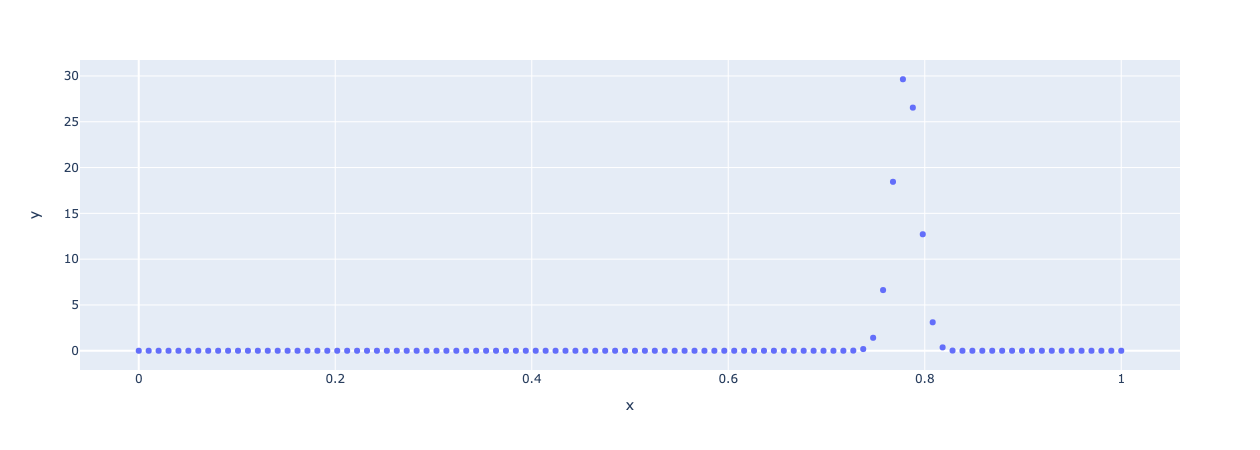

In [39]:
px.scatter(x=probs_of_heads.numpy(), y=observed_probs_heads[10].numpy())

In [19]:
probs_of_heads

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151516, 0.16161616, 0.17171717, 0.18181819, 0.1919192 ,
       0.2020202 , 0.21212122, 0.22222222, 0.23232323, 0.24242425,
       0.25252524, 0.26262626, 0.27272728, 0.28282827, 0.2929293 ,
       0.3030303 , 0.3131313 , 0.32323232, 0.33333334, 0.34343433,
       0.35353535, 0.36363637, 0.37373737, 0.3838384 , 0.3939394 ,
       0.4040404 , 0.41414142, 0.42424244, 0.43434343, 0.44444445,
       0.45454547, 0.46464646, 0.47474748, 0.4848485 , 0.4949495 ,
       0.5050505 , 0.5151515 , 0.5252525 , 0.53535354, 0.54545456,
       0.5555556 , 0.56565654, 0.57575756, 0.5858586 , 0.5959596 ,
       0.6060606 , 0.61616164, 0.6262626 , 0.6363636 , 0.64646465,
       0.65656567, 0.6666667 , 0.67676765, 0.68686867, 0.6969697 ,
       0.70707

In [25]:
observed_probs_heads[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [27]:
observed_probs_heads[2]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.        , 0.05999387, 0.11876338, 0.17630851, 0.23262927,
       0.28772575, 0.3415978 , 0.39424545, 0.44566873, 0.49586773,
       0.54484236, 0.59259254, 0.63911843, 0.68442   , 0.728497  ,
       0.77135   , 0.8129783 , 0.8533823 , 0.89256203, 0.9305173 ,
       0.9672482 , 1.0027548 , 1.037037  , 1.070095  , 1.1019285 ,
       1.1325375 , 1.1619222 , 1.1900827 , 1.2170187 , 1.2427304 ,
       1.2672179 , 1.2904805 , 1.3125192 , 1.3333333 , 1.3529232 ,
       1.3712888 , 1.3884299 , 1.4043467 , 1.4190388 , 1.4325069 ,
       1.4447504 , 1.4557698 , 1.465565  , 1.4741352 , 1.4814814 ,
       1.4876032 , 1.4925008 , 1.496174  , 1.4986227 , 1.4998469 ,
       1.4998469 , 1.4986227 , 1.496174  , 1.4925008 , 1.4876032 ,
       1.4814814 , 1.4741352 , 1.465565  , 1.4557698 , 1.4447504 ,
       1.4325069 , 1.419039  , 1.4043465 , 1.3884299 , 1.3712888 ,
       1.3529232 , 1.3333333 , 1.3125193 , 1.2904806 , 1.2672179 ,
       1.24273

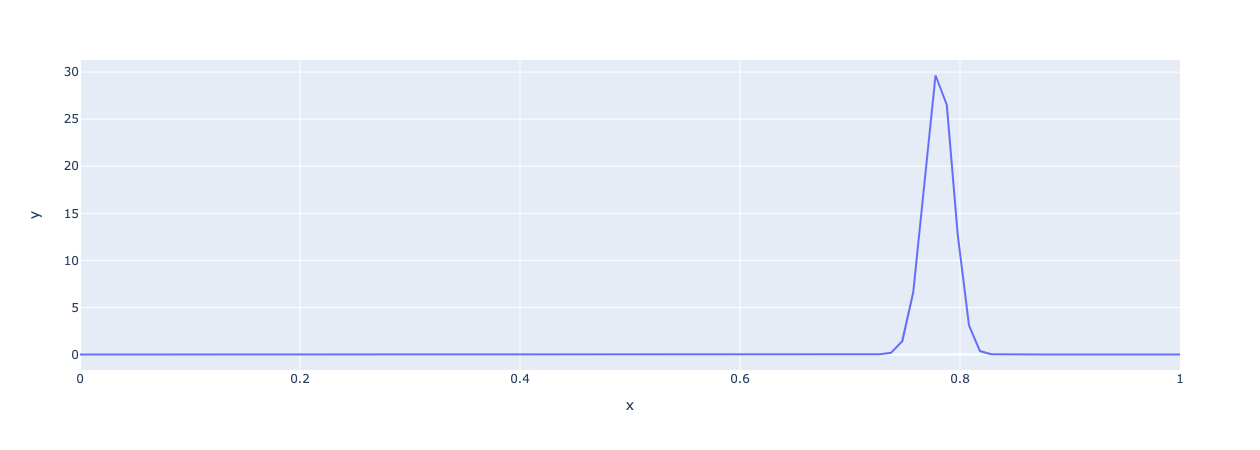

In [64]:
px.line(x = probs_of_heads, y = observed_probs_heads[10])

In [15]:
len(num_trials)

12

In [14]:
from plotly.subplots import make_subplots

In [17]:
fig = make_subplots(rows=len(num_trials)//2, cols= 2)

In [ ]:
go.Area()

In [ ]:
fig.append_trace(go.layout)

In [11]:
import matplotlib.pyplot as plt

In [12]:
# For the already prepared, I'm using Binomial's conj. prior.
plt.figure(figsize(16, 9))
for i in range(len(num_trials)):
    sx = plt.subplot(len(num_trials)/2, 2, i+1)
    plt.xlabel("$p$, probability of heads") \
    if i in [0, len(num_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.plot(probs_of_heads, observed_probs_heads[i], 
             label="observe %d tosses,\n %d heads" % (num_trials[i], cumulative_headcounts[i]))
    plt.fill_between(probs_of_heads, 0, observed_probs_heads[i], 
                     color=TFColor[3], alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities", y=1.02,
             fontsize=14)
plt.tight_layout()

NameError: name 'figsize' is not defined

### 1.2.2 예제: 사서일까? 농부일까?

## 1.3 확률분포

## 1.4 컴퓨터를 사용하여 베이지안 추론하기